![TP](../TeachersPro-logo-color.png)

# Twitter Analytics

### Lenin Escobar <lenin.escobar@net.teacherspro.com> - Descriptive analytics (12-August-2021)

In [1]:
%config IPCompleter.greedy=True
%load_ext memory_profiler
%matplotlib inline
%run TwitterAnalysisHelper.ipynb
%run TwitterAnalysisGeneralHelper.ipynb
%run TwitterAnalysis_Plot.ipynb

/opt/conda/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


<h1 style="background-color:#D7F5FF;font-size:300%;">Twitter DB</h1>

In [2]:
#Connecting to sqlite3 database
dbConn = Sqlite3Db('data/social_network.db')

In [3]:
dbConn.query('''SELECT insert_timestamp, tweet_timestamp, tweet_term, tweet, place_type, place_name, place_full_name, place_country_code, place_country FROM Tweets; ''')

sqlStmRes = dbConn.cursor.fetchall()
#print(type(sqlStmRes))
#print(sqlStmRes)
df_Tweets_original = pd.DataFrame(sqlStmRes, columns =['insert_timestamp','tweet_timestamp','tweet_term', 'tweet', 'place_type', 'place_name', 'place_full_name', 'place_country_code', 'place_country'])

In [4]:
#Closing sqlite3 datbase connection
dbConn.close()

In [5]:
df_Tweets_original.head(3)

,insert_timestamp,tweet_timestamp,tweet_term,tweet,place_type,place_name,place_full_name,place_country_code,place_country
0,2021-08-11 14:19:45.946146,2021-08-04 23:59:14,b'#edchat',b'RT @Catlin_Tucker: Worried about keeping you...,Undefined,Undefined,Undefined,Undefined,Undefined
1,2021-08-11 14:19:45.946839,2021-08-04 23:58:48,b'#edchat',b'RT @mcleod: \xe2\x80\x9cThe focus for public...,Undefined,Undefined,Undefined,Undefined,Undefined
2,2021-08-11 14:19:45.947049,2021-08-04 23:57:15,b'#edchat',b'RT @TCEA: 10 Evidence-Based #Teaching Strate...,Undefined,Undefined,Undefined,Undefined,Undefined


In [6]:
df_Tweets_original.shape

(770, 9)

In [7]:
df_Tweets_original.dtypes

insert_timestamp      datetime64[ns]
tweet_timestamp       datetime64[ns]
tweet_term                    object
tweet                         object
place_type                    object
place_name                    object
place_full_name               object
place_country_code            object
place_country                 object
dtype: object

In [8]:
cleaningHelper = CleaningHelper(version = "1.0")
print(cleaningHelper)

Cleaning helper version 1.0


In [9]:
#There should be no null
cleaningHelper.get_nulls_data(df_Tweets_original)

,Total,PercNotNull
insert_timestamp,0,100.0
tweet_timestamp,0,100.0
tweet_term,0,100.0
tweet,0,100.0
place_type,0,100.0
place_name,0,100.0
place_full_name,0,100.0
place_country_code,0,100.0
place_country,0,100.0


In [10]:
#We are going to check the tweet terms, tweet dates and places at first

In [11]:
df_Tweets_mod = df_Tweets_original.copy()

In [12]:
#df_Tweets_mod['tweet_timestamp_date'] = df_Tweets_mod['tweet_timestamp'].dt.normalize()
df_Tweets_mod['tweet_timestamp_date'] = df_Tweets_mod['tweet_timestamp'].dt.date

In [13]:
df_Tweets_mod['tweet_str'] = df_Tweets_mod['tweet'].str.decode("utf-8")
df_Tweets_mod['tweet_term_str'] = df_Tweets_mod['tweet_term'].str.decode("utf-8")
#df_Tweets_mod[df_Tweets_mod.apply(type) == object] = df_Tweets_mod.str.decode("utf-8")

In [14]:
df_Tweets_mod.dtypes

insert_timestamp        datetime64[ns]
tweet_timestamp         datetime64[ns]
tweet_term                      object
tweet                           object
place_type                      object
place_name                      object
place_full_name                 object
place_country_code              object
place_country                   object
tweet_timestamp_date            object
tweet_str                       object
tweet_term_str                  object
dtype: object

In [15]:
df_Tweets_mod.head(3)

,insert_timestamp,tweet_timestamp,tweet_term,tweet,place_type,place_name,place_full_name,place_country_code,place_country,tweet_timestamp_date,tweet_str,tweet_term_str
0,2021-08-11 14:19:45.946146,2021-08-04 23:59:14,b'#edchat',b'RT @Catlin_Tucker: Worried about keeping you...,Undefined,Undefined,Undefined,Undefined,Undefined,2021-08-04,RT @Catlin_Tucker: Worried about keeping your ...,#edchat
1,2021-08-11 14:19:45.946839,2021-08-04 23:58:48,b'#edchat',b'RT @mcleod: \xe2\x80\x9cThe focus for public...,Undefined,Undefined,Undefined,Undefined,Undefined,2021-08-04,RT @mcleod: “The focus for public education sh...,#edchat
2,2021-08-11 14:19:45.947049,2021-08-04 23:57:15,b'#edchat',b'RT @TCEA: 10 Evidence-Based #Teaching Strate...,Undefined,Undefined,Undefined,Undefined,Undefined,2021-08-04,RT @TCEA: 10 Evidence-Based #Teaching Strategi...,#edchat


<h3 style="background-color:powderblue;">Raw Data Plotting</h3>

In [16]:
plottingHelper = PlottingHelper(version = "1.0")
#print(plottingHelper)

In [17]:
plottingHelper._df_cat = df_Tweets_mod
ipywidgets.interact(plottingHelper.func_count_cat_plotty, \
                x_var_size=ipywidgets.IntSlider(layout={'border': '1px solid black'}, min=1, max=100, value=10, step=1, description="Num.Records"), \
                x_var = ipywidgets.Dropdown(layout={'border': '1px solid black'}, options=["tweet_term_str","tweet_str","place_type","place_name", \
                                                                                           "place_full_name","place_country_code","place_country","tweet_timestamp_date"], description="Feature"), \
                x_var_asc = ipywidgets.Checkbox(layout={'border': '1px solid black'}, value=False, description="Asc. Order"), \
                ax_title = ipywidgets.Textarea(layout={'border': '1px solid black'}, value="Tweets by Feature", description="Title") \
               );

interactive(children=(IntSlider(value=10, description='Num.Records', layout=Layout(border='1px solid black'), …

<h3 style="background-color:powderblue;">Data cleaning</h3>

In [18]:
#I decided to use the largest one
spacy_lg = spacy.load('en_core_web_lg')

In [19]:
# sets of punctuation in variable result 
punctuation_str = string.punctuation  
punctuation_str #I want to know if @ is actually include

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
#Stop words Set
#stop_words = spacy.lang.en.stop_words.STOP_WORDS
stop_words = cleaningHelper.get_custom_stop_words(spacy_ = spacy_lg)

In [21]:
#English parser object
parser = spacy.lang.en.English()

In [22]:
cleaningTweets = CleaningTweets(version = "1.0", spacy_ = spacy_lg, parser_ = parser, punctuation_str_ = punctuation_str, stop_words_ = stop_words)
print(cleaningTweets)

Cleaning Tweets version 1.0


In [23]:
df_doc_tokens = cleaningTweets.get_words_df(df_Tweets_ = df_Tweets_mod)

In [24]:
df_doc_tokens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7429 entries, 0 to 7428
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   token_  7429 non-null   object
dtypes: object(1)
memory usage: 58.2+ KB


In [25]:
df_doc_tokens.head(3)

,token_
0,worried
1,fast
2,finisher


In [26]:
df_Tweets_mod.head(3)

,insert_timestamp,tweet_timestamp,tweet_term,tweet,place_type,place_name,place_full_name,place_country_code,place_country,tweet_timestamp_date,tweet_str,tweet_term_str
0,2021-08-11 14:19:45.946146,2021-08-04 23:59:14,b'#edchat',b'RT @Catlin_Tucker: Worried about keeping you...,Undefined,Undefined,Undefined,Undefined,Undefined,2021-08-04,RT @Catlin_Tucker: Worried about keeping your ...,#edchat
1,2021-08-11 14:19:45.946839,2021-08-04 23:58:48,b'#edchat',b'RT @mcleod: \xe2\x80\x9cThe focus for public...,Undefined,Undefined,Undefined,Undefined,Undefined,2021-08-04,RT @mcleod: “The focus for public education sh...,#edchat
2,2021-08-11 14:19:45.947049,2021-08-04 23:57:15,b'#edchat',b'RT @TCEA: 10 Evidence-Based #Teaching Strate...,Undefined,Undefined,Undefined,Undefined,Undefined,2021-08-04,RT @TCEA: 10 Evidence-Based #Teaching Strategi...,#edchat


In [27]:
#df_doc_tokens = pd.DataFrame({'token_': pd.Series([], dtype='str')})
#df_Tweets_= df_Tweets_mod.copy()
#for index, row in df_Tweets_.iterrows():
#    if index > 0:
#        break    # break here
#    token_ = str(row["tweet"], encoding='UTF-8')
#    print(token_)
#    doc_tokens = cleaningTweets.do_spacy_tokenizer(token_ = token_)
#    #print(doc_tokens)
#    for doc_token in doc_tokens:
#        df_doc_tokens = df_doc_tokens.append({'token_' : doc_token}, ignore_index = True)

In [28]:
df_doc_tokens.groupby(['token_']).token_.value_counts().nlargest(5)

token_     token_   
learn      learn        179
edchat     edchat       170
education  education    167
k12        k12          143
edtech     edtech       116
Name: token_, dtype: int64

In [29]:
#Top 10 tokens
df_doc_tokens_grp = df_doc_tokens[['token_']].groupby(['token_'])['token_'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(10)
df_doc_tokens_grp

,token_,count
1017,learn,179
571,edchat,170
584,education,167
979,k12,143
579,edtech,116
1629,student,113
1670,tbat,74
1405,redfored,74
158,ape,74
30,2021,73


In [30]:
ls_doc_tokens = cleaningTweets.get_words_list(df_Tweets_ = df_doc_tokens)
#ls_doc_tokens

In [31]:
word_freq = collections.Counter(ls_doc_tokens)
word_freq.most_common(10)

[('learn', 179),
 ('edchat', 170),
 ('education', 167),
 ('k12', 143),
 ('edtech', 116),
 ('student', 113),
 ('ape', 74),
 ('redfored', 74),
 ('tbat', 74),
 ('2021', 73)]

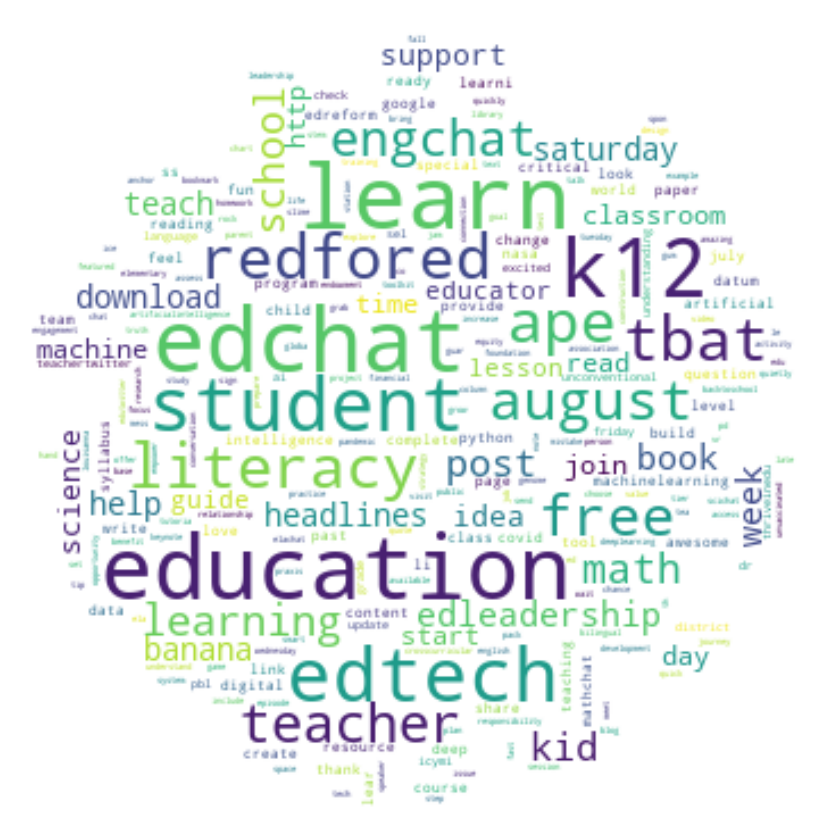

In [32]:
#Instantiate mask
char_mask = np.array(Image.open("covid19.png")) 
#Instantiate the wordcloud object
wc = wordcloud.WordCloud(background_color='white', max_words=300, stopwords=stop_words, collocations=False, max_font_size=40, random_state=42, mask=char_mask)
# Generate word cloud
wc=wc.generate(" ".join(ls_doc_tokens).lower())
# Show word cloud
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()